In [1]:
import numpy as np
import pandas as pd
dict1 = {'等级': list(range(1,5)), '组1':[122,63,2494,2912], 
         '组2':[137,28,2577,2586], '组3':[134,25,2752,2511],
         '组4':[110,28,2506,2564], '组5':[121,37,2372,2753]}
df = pd.DataFrame(dict1)
df

,等级,组1,组2,组3,组4,组5
0,1,122,137,134,110,121
1,2,63,28,25,28,37
2,3,2494,2577,2752,2506,2372
3,4,2912,2586,2511,2564,2753


In [2]:
#合计组作为标准组

df['标准组']=df['组1']+df['组2']+df['组3']+df['组4']+df['组5']

st_group=df['标准组']

df

,等级,组1,组2,组3,组4,组5,标准组
0,1,122,137,134,110,121,624
1,2,63,28,25,28,37,181
2,3,2494,2577,2752,2506,2372,12701
3,4,2912,2586,2511,2564,2753,13326


In [3]:
#求R值

df['R值']=(np.cumsum(df['标准组'])-df['标准组']/2) / np.sum(df['标准组'])

r=df['R值']
df

,等级,组1,组2,组3,组4,组5,标准组,R值
0,1,122,137,134,110,121,624,0.011628
1,2,63,28,25,28,37,181,0.026629
2,3,2494,2577,2752,2506,2372,12701,0.266678
3,4,2912,2586,2511,2564,2753,13326,0.751677


In [4]:
#均数与标准差

from statsmodels.stats.weightstats import DescrStatsW
weighted_stats_s = DescrStatsW(r,weights=df['标准组'],ddof=1)
weighted_stats_1 = DescrStatsW(r,weights=df['组1'],ddof=1)
weighted_stats_2 = DescrStatsW(r,weights=df['组2'],ddof=1)
weighted_stats_3 = DescrStatsW(r,weights=df['组3'],ddof=1)
weighted_stats_4 = DescrStatsW(r,weights=df['组4'],ddof=1)
weighted_stats_5 = DescrStatsW(r,weights=df['组5'],ddof=1)

mean_s, std_s = weighted_stats_s.mean,weighted_stats_s.std
mean_1, std_1 = weighted_stats_1.mean,weighted_stats_1.std
mean_2, std_2 = weighted_stats_2.mean,weighted_stats_2.std
mean_3, std_3 = weighted_stats_3.mean,weighted_stats_3.std
mean_4, std_4 = weighted_stats_4.mean,weighted_stats_4.std
mean_5, std_5 = weighted_stats_5.mean,weighted_stats_5.std

mean_s,std_s,mean_1,std_1,mean_2,std_2,mean_3,std_3
round(mean_1,4),round(mean_2,4),round(mean_3,4)

(0.511, 0.4943, 0.4839)

In [5]:
#可信区间

import statsmodels.api as sm
cil_s=sm.stats.DescrStatsW(r,weights=df['标准组']).tconfint_mean(alpha=0.05)
cil_1=sm.stats.DescrStatsW(r,weights=df['组1']).tconfint_mean(alpha=0.05)
cil_2=sm.stats.DescrStatsW(r,weights=df['组2']).tconfint_mean(alpha=0.05)
cil_3=sm.stats.DescrStatsW(r,weights=df['组3']).tconfint_mean(alpha=0.05)
cil_4=sm.stats.DescrStatsW(r,weights=df['组4']).tconfint_mean(alpha=0.05)
cil_5=sm.stats.DescrStatsW(r,weights=df['组5']).tconfint_mean(alpha=0.05)

round(cil_1[0],4)

0.5043

In [6]:
li_cil = [cil_s,cil_1,cil_2,cil_3,cil_4,cil_5]
for id1, i in enumerate(li_cil):
    i = list(i)
    li_cil[id1] = i



In [7]:
for id1, i in enumerate(li_cil):
    for id2, j in enumerate(i):
        li_cil[id1][id2] = round(j,4)
        
di2 = {'组别':['标准组','组1','组2','组3','组4','组5'],'可信区间':li_cil}
df_di2  = pd.DataFrame(di2)
df_di2

,组别,可信区间
0,标准组,"[0.497, 0.503]"
1,组1,"[0.5043, 0.5177]"
2,组2,"[0.4874, 0.5011]"
3,组3,"[0.4772, 0.4906]"
4,组4,"[0.4919, 0.5056]"
5,组5,"[0.505, 0.5187]"


In [8]:
df_di2['均数'] = [round(mean_s,4),round(mean_1,4),round(mean_2,4),round(mean_3,4),round(mean_4,4),round(mean_5,4)]
df_di2['标准差'] = [round(std_s,4),round(std_1,4),round(std_2,4),round(std_3,4),round(std_4,4),round(std_5,4)]
df_di2

,组别,可信区间,均数,标准差
0,标准组,"[0.497, 0.503]",0.5000,0.2536
1,组1,"[0.5043, 0.5177]",0.5110,0.2547
2,组2,"[0.4874, 0.5011]",0.4943,0.2537
3,组3,"[0.4772, 0.4906]",0.4839,0.2523
4,组4,"[0.4919, 0.5056]",0.4988,0.2523
5,组5,"[0.505, 0.5187]",0.5119,0.2537


In [9]:
#------加权函数------------------
def weighted(data, weights):
    """
        默认数据格式:DataFrame
        如果weights为n维，结果将根据其维度分组；若为1维，组别将全为1
        结果返回一个DataFrame
        参数：
            data:待加权数据、类型：Series
            weights:权值(任意维度)、类型：DataFrame
    """
    wes = weights.values.T  #获取DataFrame的元素值
    li1, li2 = [],[]
    if( len(wes) > 1):
        for id1, i in enumerate(data):
            for id2, j in enumerate(wes):
                for id3, k in enumerate(j):
                    if(id1 == id3):
                        li2 += [i]*k
                        li1 += [id2+1]*k
    elif( len(wes) == 1):
        wes = wes.ravel() #降维
        for id1, i in enumerate(data):
            for id2, j in enumerate(wes):
                if(id1 == id2):
                    li2 += [i]*j
        li1 = [1]*wes.sum()
    else:
        print('null weights')
        return 0
    dict1 = {'data':li2, '组别':li1}
    df = pd.DataFrame(dict1)
    return df 


In [10]:
#使用加权函数对数据加权

df_weighted = weighted(df['R值'],df.iloc[:,1:6])

df_weighted

,data,组别
0,0.011628,1
1,0.011628,1
2,0.011628,1
3,0.011628,1
4,0.011628,1
...,...,...
26827,0.751677,5
26828,0.751677,5
26829,0.751677,5
26830,0.751677,5


In [11]:
#ANOVA--加权函数版

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('data~C(组别)', df_weighted).fit()
df_result = anova_lm(model)

df_result

,df,sum_sq,mean_sq,F,PR(>F)
C(组别),4.0,3.018019,0.754505,11.755171,1.538671e-09
Residual,26827.0,1721.888729,0.064185,NaN,NaN


In [12]:
#-----用TukeyHSD方法进行多重比较-------------

from statsmodels.sandbox.stats.multicomp import MultiComparison
tukey_result = MultiComparison(df_weighted['data'], df_weighted['组别']).tukeyhsd()

tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.0168,0.005,-0.03,-0.0035,True
1,3,-0.0271,0.001,-0.0403,-0.014,True
1,4,-0.0122,0.0886,-0.0255,0.0011,False
1,5,0.0009,0.9,-0.0124,0.0141,False
2,3,-0.0104,0.2098,-0.0237,0.003,False
2,4,0.0045,0.886,-0.0089,0.018,False
2,5,0.0176,0.0031,0.0042,0.0311,True
3,4,0.0149,0.0206,0.0015,0.0283,True
3,5,0.028,0.001,0.0147,0.0414,True
4,5,0.0131,0.0616,-0.0004,0.0266,False


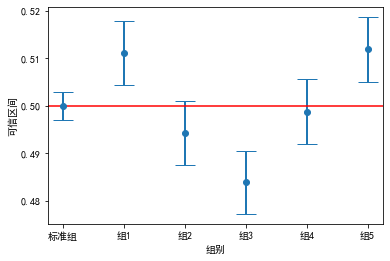

In [13]:

import matplotlib.pyplot as plt
err = [x[1] for x in df_di2['可信区间']] - df_di2['均数']
fig, ax = plt.subplots()
ax.errorbar(df_di2['组别'], df_di2['均数'],err,fmt='o',linewidth=2,capsize=10)
plt.axhline(y=0.5,c='red')
plt.xlabel('组别'), plt.ylabel('可信区间')
plt.show()
